In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dftools

Welcome to JupyROOT 6.18/00


In [3]:
plt.style.use("cms")
plt.rcParams.update({
    "font.size": 10,
    "figure.figsize": (3, 2.25),
    "figure.dpi": 100,
})

In [4]:
df = pd.read_csv("data/muon_id_tight_runGH.txt", sep='\s+')
df

,eta_low,eta_high,pt_low,pt_high,correction,unc_up,unc_down
0,0.0,0.9,20.0,25.0,0.993173,0.002642,0.002642
1,0.9,1.2,20.0,25.0,0.985596,0.015529,0.015529
2,1.2,2.1,20.0,25.0,0.990863,0.001871,0.001871
3,2.1,2.4,20.0,25.0,0.981501,0.003092,0.003092
4,0.0,0.9,25.0,30.0,0.986990,0.046316,0.046316
5,0.9,1.2,25.0,30.0,0.984686,0.001699,0.001699
6,1.2,2.1,25.0,30.0,0.990917,0.000941,0.000941
7,2.1,2.4,25.0,30.0,0.979109,0.053287,0.053287
8,0.0,0.9,30.0,40.0,0.987596,0.000369,0.000369
9,0.9,1.2,30.0,40.0,0.983914,0.000600,0.000600


In [5]:
def draw2d(df, ax, labels, kwargs):
    xbins = np.array(sorted(set(list(df["eta_low"])+list(df["eta_high"]))))
    ybins = np.array(sorted(set(list(df["pt_low"])+list(df["pt_high"]))))

    hist, _, _, im = ax.hist2d(
        df["eta_low"], df["pt_low"],
        bins = (xbins, ybins),
        weights = df["correction"],
        cmap = "RdYlBu",
    )
    
    if "logy" in kwargs and kwargs['logy']:
        ax.set_yscale('log')

    ax.set_xlim(xbins.min(), xbins.max())
    ax.set_ylim(ybins.min(), ybins.max())
    ax.set_xlabel(labels["x"])
    ax.set_ylabel(labels["y"])
    
    from matplotlib.ticker import ScalarFormatter
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_xticks(xbins)
    ax.set_yticks(ybins)
    
    if "text" in kwargs and kwargs["text"]:
        for i in range(len(xbins)-1):
            for j in range(len(ybins)-1):
                ax.text(
                    (xbins[i]+xbins[i+1])/2, (ybins[j]+ybins[j+1])/2,
                    "{:.2f}".format(hist[i,j]),
                    ha='center', va='center', color='white',
                )
            
    im.set_clim(kwargs["clim"])
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(labels["z"])
    
    dftools.draw.cms_label(ax, "") # "Preliminary")

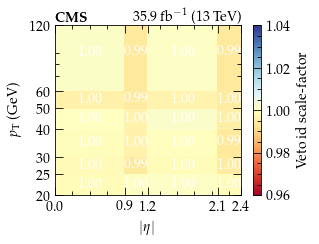

In [14]:
df = pd.read_csv("data/muon_id_loose_runBCDEF.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Veto id scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_id_loose_runbf.pdf", bbox_inches='tight')

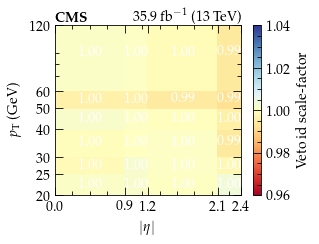

In [15]:
df = pd.read_csv("data/muon_id_loose_runGH.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Veto id scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_id_loose_rungh.pdf", bbox_inches='tight')

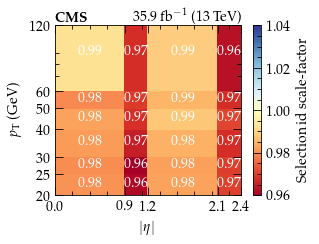

In [16]:
df = pd.read_csv("data/muon_id_tight_runBCDEF.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Selection id scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_id_tight_runbf.pdf", bbox_inches='tight')

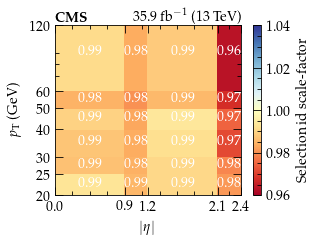

In [17]:
df = pd.read_csv("data/muon_id_tight_runGH.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Selection id scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_id_tight_rungh.pdf", bbox_inches='tight')

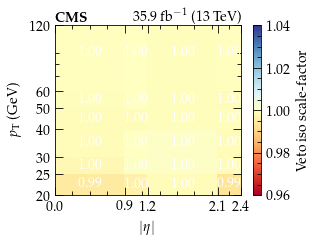

In [18]:
df = pd.read_csv("data/muon_iso_loose_looseID_runBCDEF.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Veto iso scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_iso_loose_runbf.pdf", bbox_inches='tight')

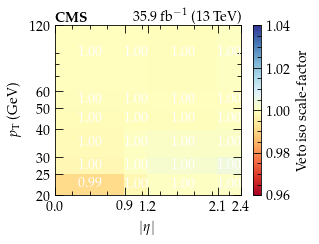

In [19]:
df = pd.read_csv("data/muon_iso_loose_looseID_runGH.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Veto iso scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_iso_loose_rungh.pdf", bbox_inches='tight')

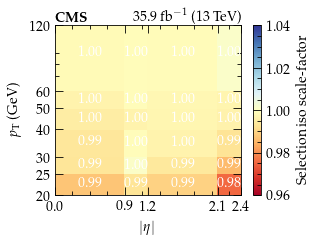

In [20]:
df = pd.read_csv("data/muon_iso_tight_tightID_runBCDEF.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Selection iso scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_iso_tight_runbf.pdf", bbox_inches='tight')

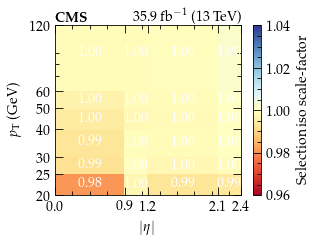

In [21]:
df = pd.read_csv("data/muon_iso_tight_tightID_runGH.txt", sep='\s+')
fig, ax = plt.subplots()
draw2d(
    df, ax,
    {"x": r'$|\eta|$', "y": r'$p_{\mathrm{T}}$ (GeV)', "z": r'Selection iso scale-factor'},
    {"clim": (0.96, 1.04), "logy": True, "text": True},
)
fig.savefig("plots/muon_iso_tight_rungh.pdf", bbox_inches='tight')